# Parte 6 - Sección 25: Upper confidence bound

In [4]:
import pandas as pd

df = pd.read_csv('Ads_CTR_Optimisation.csv')

In [14]:
import numpy as np

d = len(df.columns) # Núm de anuncios
N = len(df) # Núm de rondas
num_selections = np.zeros(d)
sums_rewards = np.zeros(d)
total_reward = 0

for r in range(N):
    if r < d:
        ad = r
    else:
        avg_rewards = sums_rewards / num_selections
        delta = np.sqrt(3/2 * np.log(r + 1) / num_selections)
        upper_bounds = avg_rewards + delta
        ad = np.argmax(upper_bounds)

    reward = df.values[r, ad]
    num_selections[ad] += 1
    sums_rewards[ad] += reward
    total_reward += reward

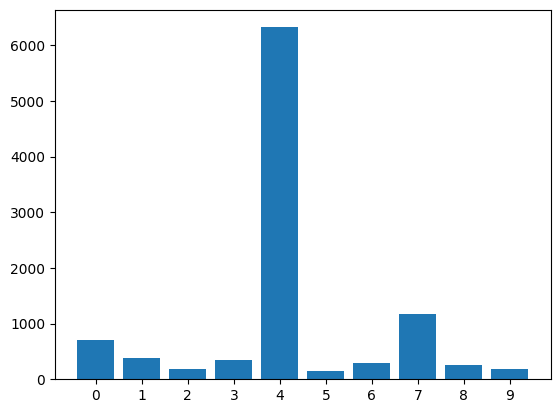

In [20]:
import matplotlib.pyplot as plt

plt.bar(range(d), num_selections)
plt.xticks(range(d))
plt.show()